# 2 Machine Learning Models

## 2.X Decision Tree Regression

This notebook runs the Decision Tree regression model (uses simple decision rules built on if-then-else logic) from the SciKit Learn python library (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

The problem posed is to predict electricity consumption at a local (LSOA) level, the data is therefore continuous and numerical and is labelled. This lends to supervised machine learning (ML) and regression models.

It is hypothesised that there will be a correlation between mean house price sales (as an indicator of general prosperity and condition of a property) and electricity consumption. This data has previously been cleaned, is read in and split into training and test data. Results are printed in line and exported to csv for comparison against other regression models.

It is hypothesized that decision tree regression models will perform well with the given data set; by adjusting the max_depth hyperparameter deeper trees with more complex decision rules can be created which would be expected to produce a better fit.

The risk of this approach is that deeper trees that fit well may not be good at generalising and may be overfitted. First the Notebook runs through refining max_depth to achieve as optimum fit as appears possible for the two feature variable tests. Then steps are taken to try to prevent overfitting through pruning or setting the minimum number of samples required at a leaf node - as recommended in the SciKit Learn documentation.

Decision trees can also be unstable around variations in data - this is overcome using ensemble methods such as Random Forest - which has also been used as an alternative model.

The feature variables include: 'Year', 'Mean price paid', and OS coordinate location data for the population weighted centroid of the LSOAs.

Initially the models were tested with 'Year' and 'Mean price paid', followed by a second model run with all the above feature variables included.

Decision Tree has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:

1. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
2. Splitter - set to default of 'best' (rather than random)
3. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure.
4. Random State - randomness of samples taken and also randomness of features considered at each node / branch. It is not known what effect this will on the model, but setting to an integer allows for replicability.

The following additional hyperparameters can be used to prevent overfitting of a tree
5. min_samples_split - Defines the minimum number of samples required for a split at an internal node.
6. min_samples_leaf - Similarly defines the minimum number of samples required for a split at a leaf node. Both are used to limit tree growth and prevent overfitting.
7. ccp_alpha - is the Complexity Parameter used for pruning to prevent overfitting (for more info see the SciKit Learn documentation: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py).

All other hyperparameters are not specified and set to the default values.

## 2.3.1 Import Model Libraries

Data handling and scientific libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays) pandas - (data analysis library) matplotlib - (enables plotting and visualisation in Python) openpyxl / load_workbook (opens Excel xlsx files)

In [157]:
#Import Libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook

Imports the Decision Tree Regressor model from the SciKit Learn library.

In [159]:
#Import ML models

In [160]:
from sklearn.tree import DecisionTreeRegressor

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor

#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import RandomForestRegressor


Imports the standard error metric functions of Variance (explained variance), MAE, MSE and R2 from the SciKit Learn library.

Explained variance is an indicator of whether the model is accounting for the variance in the dataset.

MAE - is the real error averaged across the predicted values.

MSE - is the square of the mean error, which indicates risk and the quality of the prediction. Values closer to zero are better.

R squared or R2 'represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.'1 An R2 value closer to 1 indicates a good fit.

1 - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [161]:
#Import Error Metrics

In [162]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [163]:
#Import Test/Train split function

In [164]:
from sklearn.model_selection import train_test_split

## 2.3.2 Import Data & Split into Train/Test Data

The train_test_split function allows you to defined test_size and train_size, if one isn't specified it is set as the complementary value.

A training size of 0.75-0.8 is generally recommended. Sensitivity testing to the training size showed continuous improvement with a larger training size. Beyond 80% of the data for training may lead to overfitting hence selection at this point.

Defining the random_state with an integer allows repetition across different Notebooks/model runs.

In [165]:
#Read in datafile

In [166]:
df_LSOA_Location_Energy_Sales = pd.read_csv('1_DataCleaning/LSOA_Location_Energy_Sales.csv')

In [167]:
#Split df_LSOA_Location_Energy_Sales dataset 80:20

In [168]:
train, test = train_test_split(df_LSOA_Location_Energy_Sales, test_size=0.2, train_size=0.8, random_state=10)

## 2.3.3 Model Set-up, Training, Prediction & Evaluation

The model function undertakes the following steps:

1. The model is defined, taking the feature variables and hyperparameters as arguments.

2. The model is trained using .fit on the specified training data.

3. The model is run using .predict on the feature variables.

4. Evaluation metrics are printed to screen, stored in a dataframe and plotted (against number of neighbors).

The function returns the dataframe of evaluation metrics.

In [114]:
def DecisionTree(feature_variables, criterion, max_depth, random_state):
         
    #Define empty dataframe
    df_Results = None
    
    #Fit & Run model
    for d in max_depth:
        #Define the model
        regr = DecisionTreeRegressor(criterion=criterion, max_depth=d, random_state=random_state)
            
        #Set the training data
        x_train = np.asanyarray(train[feature_variables])
        y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Train the model on the set training data
        regr.fit(x_train, y_train.ravel())
        
        #Predict results using the trained model and the previously defined test data
        y_hat = regr.predict(test[feature_variables])
    
        x_test = np.asanyarray(test[feature_variables[0]])
        y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Check the shape of the data
        #print(x_test.shape)
        #print(y_test.shape)
        #print(y_hat.shape)
        y_test = np.squeeze(y_test)
        #print(y_test.shape)
        
        #Run evaluation metrics to check the model performance & print results to notebook
        print("DecisionTree: max_depth=%.2f" % d, feature_variables)
        print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
        print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
        print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
        print("R2-score: %.2f" % r2_score(y_test, y_hat))
        print(" ")
        
        
        #Plot the results
        plt.figure()
        plt.scatter(x_test, y_test, s=5, edgecolor="black", c="black", label="data")
        plt.plot(x_test, y_hat, color="cornflowerblue", label="max_depth=%.2f" % d, linewidth=1)
        plt.xlabel("data")
        plt.ylabel("target")
        plt.title("Decision Tree Regression")
        plt.legend()
        plt.show()
        
        
        #Set up temporary results df
        df = None
        df = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
                  index=["DecisionTree: max_depth=%.2f" % d])
        df.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
        df.insert(2,'MSE', mean_squared_error(y_test, y_hat))
        df.insert(3,'R2_score', r2_score(y_test, y_hat))
        df.insert(0, 'Model', 'DecisionTree')
        df.insert(1, 'max_depth', d)
        df.insert(2, 'Feature Variables', [feature_variables])                          
        
        #Add each df to master df
        if df_Results is None:
            df_Results = df
        else:
            df_Results = pd.concat([df_Results, df], axis=0)                   
    
    #Plot learning curve of R2_score
    plt.scatter(df_Results.max_depth, df_Results.R2_score)
    plt.xlabel("max_depth")
    plt.ylabel("R2_score")
    plt.title("Decision Tree Learning Curve - R2")
    plt.show()

    #Plot learning curve of MAE
    plt.scatter(df_Results.max_depth, df_Results.MAE)
    plt.xlabel("max_depth")
    plt.ylabel("MAE")
    plt.title("Decision Tree Learning Curve - MAE")
    plt.show()
    
    
    
    return df_Results       
    

## 2.3.3.1 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year)

In the first instance 'Year' and 'Mean Price Paid' are selected as feature variables to predict 'Mean_domestic_electricity_consumption_kWh_per_meter'.

This model is expected to predict with a better fit relatively than the linear models where either 'Year' or 'Mean Price Paid' were taken as the sole feature variable as plotting of the data shows a (weak) positive correlation. From the previous simple linear model runs it is expected that 'Mean Price Paid' is the more dominant feature variable, but there is expected to be some degree of annual correlation that together could provide a better fit model.

The Decision Tree algorithm may be better at handling the variance in the data set but is still not expected to have an objectively good fit when only the above two feature variables are selected.

As many factors affect electricity consumption it is expected that either a greater number of feature variables (or a model better able to deal with variance/complexity in the data) will provide a better fit. Noting that Decision Tree is hypothesized to be one of the algorithms better able to fit to the dataset.

Decision Tree has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:

1. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
2. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 4 to 20, and none, to determine which max_depth provides the best fit model.
3. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.

All other hyperparameters are not specified and set to the default values.

In [118]:
max_depth = [4, 5, 6, 7, 8, 9, 10, 12, 15, 20]

DecisionTree: max_depth=4.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.27
MAE: 515.40
MSE: 562183.18
R2-score: 0.27
 


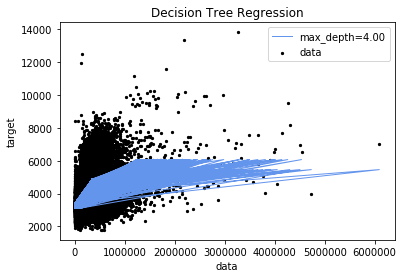

DecisionTree: max_depth=5.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.28
MAE: 508.93
MSE: 553946.00
R2-score: 0.28
 


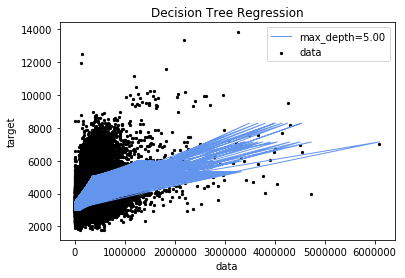

DecisionTree: max_depth=6.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.28
MAE: 505.39
MSE: 548881.45
R2-score: 0.28
 


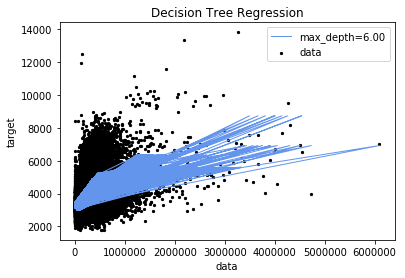

DecisionTree: max_depth=7.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.29
MAE: 503.73
MSE: 546217.69
R2-score: 0.29
 


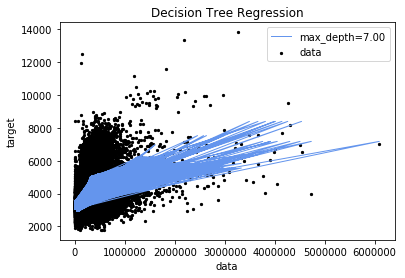

DecisionTree: max_depth=8.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.28
MAE: 503.74
MSE: 548171.67
R2-score: 0.28
 


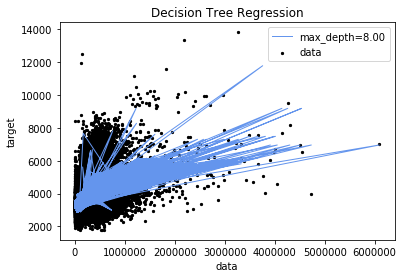

DecisionTree: max_depth=9.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.28
MAE: 504.71
MSE: 551497.31
R2-score: 0.28
 


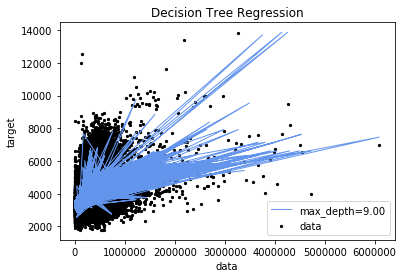

DecisionTree: max_depth=10.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.27
MAE: 505.91
MSE: 555140.76
R2-score: 0.27
 


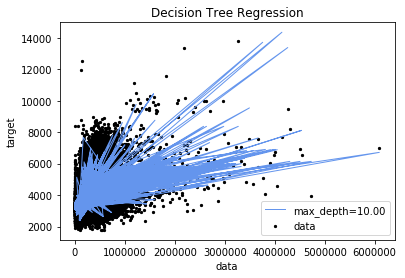

DecisionTree: max_depth=12.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.26
MAE: 510.92
MSE: 567592.96
R2-score: 0.26
 


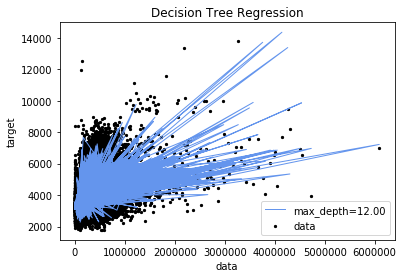

DecisionTree: max_depth=15.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.22
MAE: 523.40
MSE: 600720.45
R2-score: 0.22
 


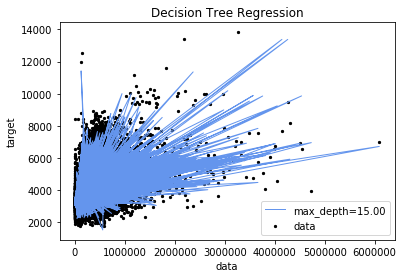

DecisionTree: max_depth=20.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.10
MAE: 558.17
MSE: 688589.67
R2-score: 0.10
 


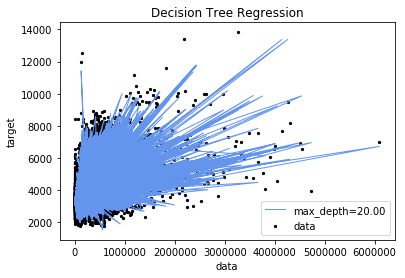

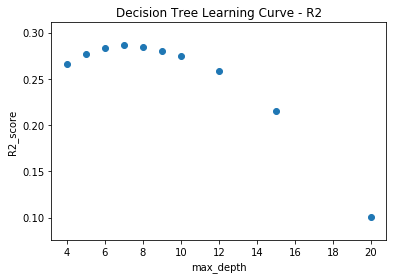

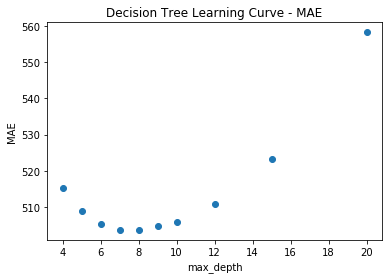

In [119]:
df_Results_1 = DecisionTree(['Mean_price_paid','Year'], 'mse', max_depth, 0)

In [120]:
df_Results_1

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
DecisionTree: max_depth=4.00,DecisionTree,4,"[Mean_price_paid, Year]",0.265614,515.397472,562183.184773,0.265614
DecisionTree: max_depth=5.00,DecisionTree,5,"[Mean_price_paid, Year]",0.276374,508.926818,553946.000862,0.276374
DecisionTree: max_depth=6.00,DecisionTree,6,"[Mean_price_paid, Year]",0.282990,505.394634,548881.454531,0.282990
DecisionTree: max_depth=7.00,DecisionTree,7,"[Mean_price_paid, Year]",0.286470,503.733822,546217.692487,0.286470
DecisionTree: max_depth=8.00,DecisionTree,8,"[Mean_price_paid, Year]",0.283917,503.742614,548171.666033,0.283917
DecisionTree: max_depth=9.00,DecisionTree,9,"[Mean_price_paid, Year]",0.279573,504.710043,551497.308916,0.279573
DecisionTree: max_depth=10.00,DecisionTree,10,"[Mean_price_paid, Year]",0.274813,505.911345,555140.760589,0.274813
DecisionTree: max_depth=12.00,DecisionTree,12,"[Mean_price_paid, Year]",0.258547,510.924845,567592.964105,0.258547
DecisionTree: max_depth=15.00,DecisionTree,15,"[Mean_price_paid, Year]",0.215272,523.399776,600720.453390,0.215272
DecisionTree: max_depth=20.00,DecisionTree,20,"[Mean_price_paid, Year]",0.100488,558.173680,688589.671126,0.100488


Explained Variance - peaks at 0.286 with a max_depth of 7. This is higher than achieved over the linear or kNN algorithms. But the model still does not deal with the variance in the model.

MAE - the MAE is marginally improved over the equivalent kNN model runs and linear models.

MSE - is still high, reflecting a high risk of a low quality prediction.

R2 - is 0.286, demonstrating the model 'fit' is still poor.

CONCLUSION:

Overall the Decision Tree algorithm with feature variables of 'mean price paid', 'year', performs best overall compared to kNN and linear model equivalent runs. A max_depth of 7 appears to provide the optimum achievable fit with these feature variables.

However, an R2 score of 0.286 and a MAE of still >10% compared to the mean for the data set is still not a good enough fit to use the model in earnest. Further improvements through further model refinments, additional possible feature variables or alternative models would be required.

In [121]:
#Export results to csv

In [122]:
df_Results_1.to_csv('2_ModelResults/DecisionTree_Results_1.csv')

## 2.3.3.2 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year, X, Y)

Location as a feature variable is expected to improve the model and support better management of the variance in the data set.

Location is denoted by two feature variables 'X' and 'Y' which represent the X, Y OS Coordinates of the population weighted centroid for each LSOA. Both are therefore implemented within the same model run.

The hyperparameters varied within the below model runs are:

1. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
2. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 5 to 20, and none, to determine which max_depth provides the best fit model.
3. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.

All other hyperparameters are not specified and set to the default values.

In [123]:
max_depth = [5, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20]

DecisionTree: max_depth=5.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.37
MAE: 481.73
MSE: 484759.20
R2-score: 0.37
 


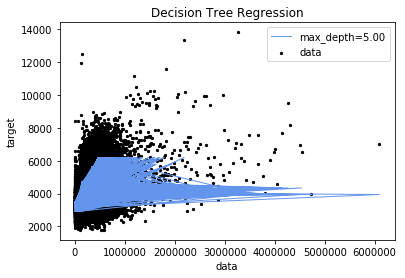

DecisionTree: max_depth=7.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.44
MAE: 454.79
MSE: 428158.08
R2-score: 0.44
 


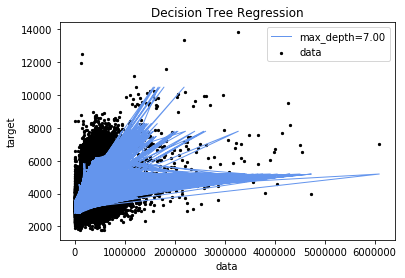

DecisionTree: max_depth=10.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.54
MAE: 412.49
MSE: 351272.68
R2-score: 0.54
 


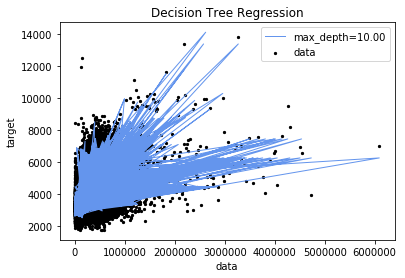

DecisionTree: max_depth=12.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.59
MAE: 388.90
MSE: 316597.78
R2-score: 0.59
 


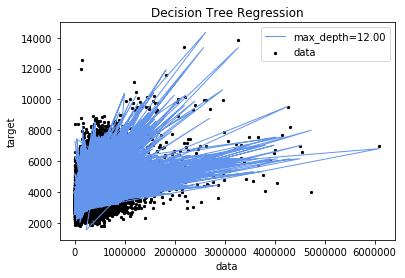

DecisionTree: max_depth=13.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.60
MAE: 379.04
MSE: 303212.54
R2-score: 0.60
 


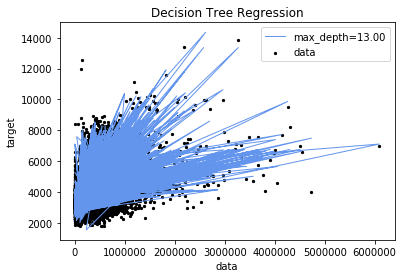

DecisionTree: max_depth=14.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.62
MAE: 370.02
MSE: 293355.14
R2-score: 0.62
 


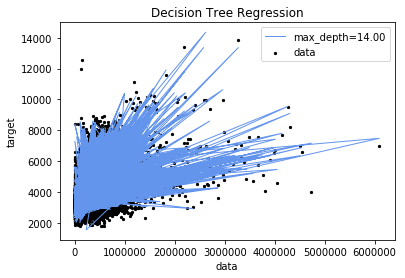

DecisionTree: max_depth=15.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.63
MAE: 363.40
MSE: 286369.07
R2-score: 0.63
 


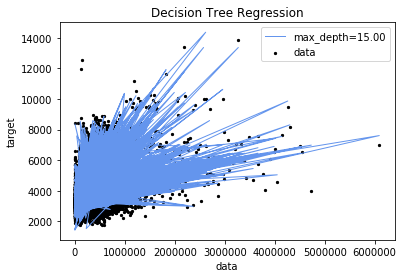

DecisionTree: max_depth=16.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.63
MAE: 359.64
MSE: 286683.15
R2-score: 0.63
 


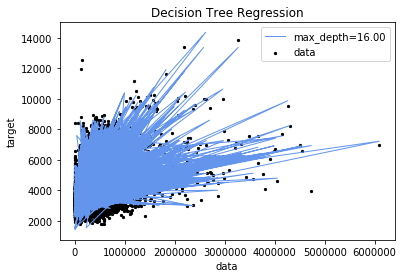

DecisionTree: max_depth=17.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.62
MAE: 357.75
MSE: 289865.79
R2-score: 0.62
 


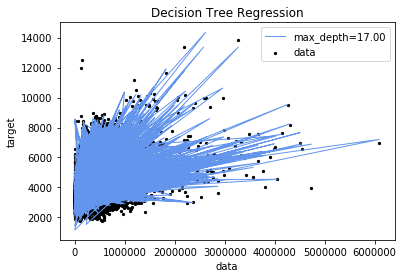

DecisionTree: max_depth=18.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.61
MAE: 357.32
MSE: 296343.58
R2-score: 0.61
 


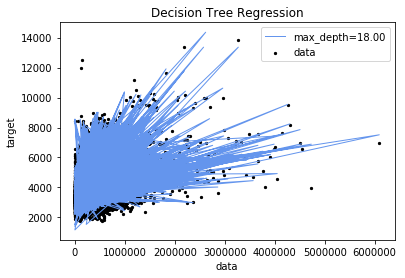

DecisionTree: max_depth=19.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.61
MAE: 358.48
MSE: 301314.47
R2-score: 0.61
 


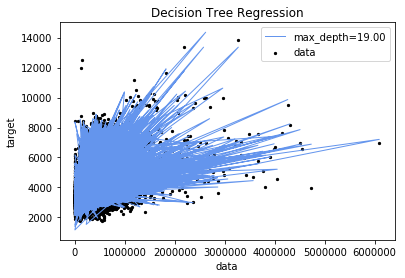

DecisionTree: max_depth=20.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.59
MAE: 361.82
MSE: 312344.66
R2-score: 0.59
 


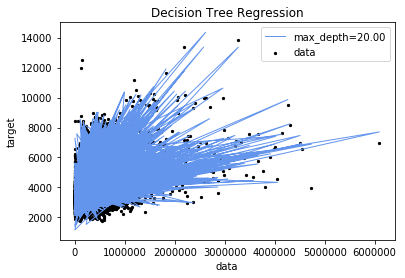

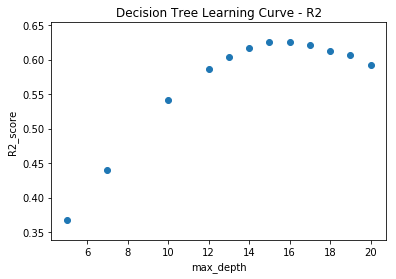

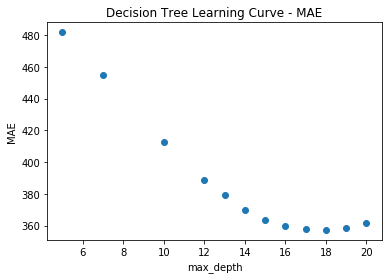

In [124]:
df_Results_2 = DecisionTree(['Mean_price_paid','Year', 'X', 'Y'], 'mse', max_depth, 0)

In [125]:
df_Results_2

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
DecisionTree: max_depth=5.00,DecisionTree,5,"[Mean_price_paid, Year, X, Y]",0.366755,481.730381,484759.201414,0.366754
DecisionTree: max_depth=7.00,DecisionTree,7,"[Mean_price_paid, Year, X, Y]",0.440694,454.790319,428158.077304,0.440692
DecisionTree: max_depth=10.00,DecisionTree,10,"[Mean_price_paid, Year, X, Y]",0.541131,412.489391,351272.677905,0.541129
DecisionTree: max_depth=12.00,DecisionTree,12,"[Mean_price_paid, Year, X, Y]",0.586432,388.895175,316597.776410,0.586425
DecisionTree: max_depth=13.00,DecisionTree,13,"[Mean_price_paid, Year, X, Y]",0.603918,379.044113,303212.539078,0.603910
DecisionTree: max_depth=14.00,DecisionTree,14,"[Mean_price_paid, Year, X, Y]",0.616803,370.016527,293355.135828,0.616787
DecisionTree: max_depth=15.00,DecisionTree,15,"[Mean_price_paid, Year, X, Y]",0.625944,363.398509,286369.065498,0.625913
DecisionTree: max_depth=16.00,DecisionTree,16,"[Mean_price_paid, Year, X, Y]",0.625543,359.640156,286683.147403,0.625503
DecisionTree: max_depth=17.00,DecisionTree,17,"[Mean_price_paid, Year, X, Y]",0.621396,357.753511,289865.787806,0.621345
DecisionTree: max_depth=18.00,DecisionTree,18,"[Mean_price_paid, Year, X, Y]",0.612934,357.318602,296343.581866,0.612883


Explained Variance - peaks at 0.626 with a max_depth of 15. This is higher than achieved over the linear or kNN algorithmsand the earlier Decision Tree model run without the location parameters. The model is dealing much better with variance.

MAE -  the MAE is significantly improved over the equivalent kNN model runs and linear models and predicts within ~7% of the mean electricity consumption for the data set.

MSE - is also improved, but arguably still high with the possibility of a poor prediction.

R2 - also appears to be levelling out at 0.626, demonstrating the model 'fit' is 'average' - albeit improvements would still be looked for.

CONCLUSION:

Overall the Decision Tree algorithm with feature variables of 'mean price paid', 'year', 'X' and 'Y' performs best overall compared to kNN and linear model equivalent runs. A max_depth of 15 appears to provide the optimum achievable fit with these feature variables.

The model is substantially improved compared to earlier algorithm/model choice and runs (differing feature variables and hyperparameters) but further improvements would still be looked for through addition of other possible feature variables and tuning of hyperparameters. 

It is hypothesized that the Random Forest ensemble regressor will perform well, improving the fit whilst also resulting in a more stable model. This is tested in a separate Notebook.

In [126]:
#Export results to csv

In [127]:
df_Results_2.to_csv('2_ModelResults/DecisionTree_Results_2.csv')

## 2.3.3.3 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year, X, Y) - max_depth=None

In [128]:
#Run model with max_depth set to None - 'Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.' [Definition from SciKit Learn]

In [142]:
max_depth = None

In [143]:
def DecisionTree(feature_variables, criterion, max_depth, random_state):
         
    #Define empty dataframe
    df_Results = None
    
    #Fit & Run model
    
    #Define the model
    regr = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, random_state=random_state)

    #Set the training data
    x_train = np.asanyarray(train[feature_variables])
    y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])

    #Train the model on the set training data
    regr.fit(x_train, y_train.ravel())

    #Predict results using the trained model and the previously defined test data
    y_hat = regr.predict(test[feature_variables])

    x_test = np.asanyarray(test[feature_variables])
    y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])

    #Check the shape of the data
    y_test = np.squeeze(y_test)
    y_test.shape

    #Run evaluation metrics to check the model performance & print results to notebook
    print("DecisionTree: max_depth=None" % feature_variables)
    print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
    print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
    print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
    print("R2-score: %.2f" % r2_score(y_test, y_hat))
    print(" ")

    #Set up temporary results df
    df = None
    df = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
              index=["DecisionTree: max_depth=None"])
    df.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
    df.insert(2,'MSE', mean_squared_error(y_test, y_hat))
    df.insert(3,'R2_score', r2_score(y_test, y_hat))
    df.insert(0, 'Model', 'DecisionTree')
    df.insert(1, 'max_depth', 'None')
    df.insert(2, 'Feature Variables', [feature_variables])                          

    #Add each df to master df
    if df_Results is None:
        df_Results = df
    else:
        df_Results = pd.concat([df_Results, df], axis=0)                   
    
        
    return df_Results       
    

In [144]:
df_Results_3 = DecisionTree(['Mean_price_paid','Year', 'X', 'Y'], 'mse', max_depth, 0)

DecisionTree: max_depth=None
Explained Variance Score: 0.55
MAE: 381.39
MSE: 342665.35
R2-score: 0.55
 


In [145]:
df_Results_3

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
DecisionTree: max_depth=None,DecisionTree,None,"[Mean_price_paid, Year, X, Y]",0.552424,381.388992,342665.354106,0.552372


Running the model with max_depth set to 'None' as a check on the best value for max_depth produces a worse fit. This could be an indicator that setting the max_depth for optimal performance is producing an overfitted model.

As, from the SciKit Learn documentation, 'If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.'

In [146]:
random_state = None

In [147]:
max_depth = 15

In [148]:
df_Results_4 = DecisionTree(['Mean_price_paid','Year', 'X', 'Y'], 'mse', max_depth, random_state)

DecisionTree: max_depth=None
Explained Variance Score: 0.63
MAE: 363.61
MSE: 286808.91
R2-score: 0.63
 


In [136]:
df_Results_4

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
DecisionTree: max_depth=None,DecisionTree,None,"[Mean_price_paid, Year, X, Y]",0.625748,363.475514,286521.762917,0.625713


Running the model with random_state set to 'None' has confirmed that setting random_state to an integer value of zero for repeatability doesn't have a negative impact on the model performance.

## 2.3.4 - Model Evaluation - Overfitting 

## 2.3.4.1 - Model Evaluation (Feature Variables = Mean Price Paid, Year, X, Y) 

It is hypothesized that some of the above model runs are overfitting (when max_depth is set to None), resulting in a model that is not well generalised. To explore and address this, 3 further hyperparameters are tested which either limit tree growth or prune the tree to prevent overfitting.

The 'standard' hyperparameters varied within the below model runs are:

1. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
2. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 4 to 20, and none, to determine which max_depth provides the best fit model.
3. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.


The following additional hyperparameters can be used to prevent overfitting of a tree and are tested in the following model runs:

4. min_samples_split - Defines the minimum number of samples required for a split at an internal node.
5. min_samples_leaf - Similarly defines the minimum number of samples required for a split at a leaf node. Both are used to limit tree growth and prevent overfitting.
6. ccp_alpha - is the Complexity Parameter used for pruning to prevent overfitting (for more info see the SciKit Learn documentation: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py).

All other hyperparameters are not specified and set to the default values.

In [169]:
def DecisionTree_OverfitLimit(feature_variables, criterion, max_depth, random_state, min_samples_split, min_samples_leaf):
         
    #Define empty dataframe
    df_Results = None
    
    #Fit & Run model
    for d in max_depth:
        #Define the model
        regr = DecisionTreeRegressor(criterion=criterion, max_depth=d, random_state=random_state, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            
        #Set the training data
        x_train = np.asanyarray(train[feature_variables])
        y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Train the model on the set training data
        regr.fit(x_train, y_train.ravel())
        
        #Predict results using the trained model and the previously defined test data
        y_hat = regr.predict(test[feature_variables])
    
        x_test = np.asanyarray(test[feature_variables[0]])
        y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Check the shape of the data
        #print(x_test.shape)
        #print(y_test.shape)
        #print(y_hat.shape)
        y_test = np.squeeze(y_test)
        #print(y_test.shape)
        
        #Run evaluation metrics to check the model performance & print results to notebook
        print("DecisionTree: max_depth=%.2f" % d, feature_variables)
        print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
        print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
        print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
        print("R2-score: %.2f" % r2_score(y_test, y_hat))
        print(" ")
        
        
        #Plot the results
        plt.figure()
        plt.scatter(x_test, y_test, s=5, edgecolor="black", c="black", label="data")
        plt.plot(x_test, y_hat, color="cornflowerblue", label="max_depth=%.2f" % d, linewidth=1)
        plt.xlabel("data")
        plt.ylabel("target")
        plt.title("Decision Tree Regression")
        plt.legend()
        plt.show()
        
        
        #Set up temporary results df
        df = None
        df = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
                  index=["DecisionTree: max_depth=%.2f" % d])
        df.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
        df.insert(2,'MSE', mean_squared_error(y_test, y_hat))
        df.insert(3,'R2_score', r2_score(y_test, y_hat))
        df.insert(0, 'Model', 'DecisionTree')
        df.insert(1, 'max_depth', d)
        df.insert(2, 'Feature Variables', [feature_variables])                          
        
        #Add each df to master df
        if df_Results is None:
            df_Results = df
        else:
            df_Results = pd.concat([df_Results, df], axis=0)                   
    
    #Plot learning curve of R2_score
    plt.scatter(df_Results.max_depth, df_Results.R2_score)
    plt.xlabel("max_depth")
    plt.ylabel("R2_score")
    plt.title("Decision Tree Learning Curve - R2")
    plt.show()

    #Plot learning curve of MAE
    plt.scatter(df_Results.max_depth, df_Results.MAE)
    plt.xlabel("max_depth")
    plt.ylabel("MAE")
    plt.title("Decision Tree Learning Curve - MAE")
    plt.show()
    
    
    
    return df_Results       
    

In [153]:
max_depth = [15, 16, 17, 18, 19, 20]

DecisionTree: max_depth=15.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.62
MAE: 365.85
MSE: 287586.36
R2-score: 0.62
 


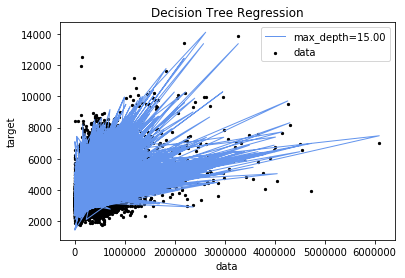

DecisionTree: max_depth=16.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.63
MAE: 361.93
MSE: 285965.50
R2-score: 0.63
 


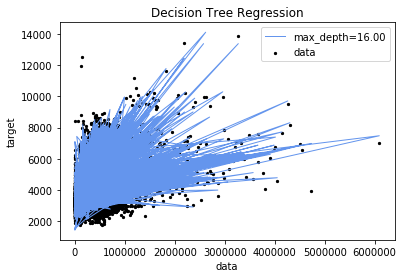

DecisionTree: max_depth=17.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.62
MAE: 359.83
MSE: 287175.93
R2-score: 0.62
 


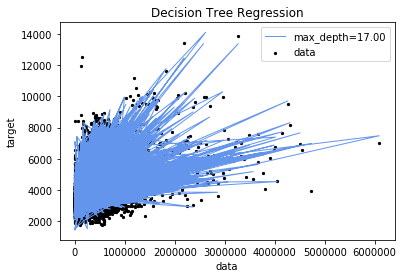

DecisionTree: max_depth=18.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.62
MAE: 360.15
MSE: 290384.71
R2-score: 0.62
 


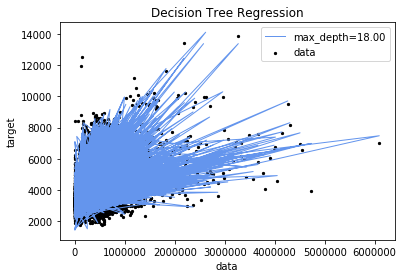

DecisionTree: max_depth=19.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.62
MAE: 361.28
MSE: 294512.24
R2-score: 0.62
 


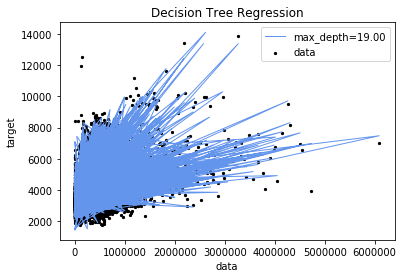

DecisionTree: max_depth=20.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.61
MAE: 363.80
MSE: 298897.32
R2-score: 0.61
 


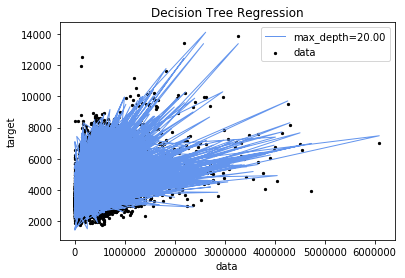

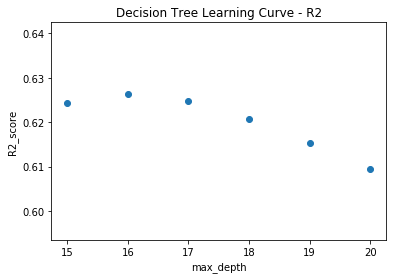

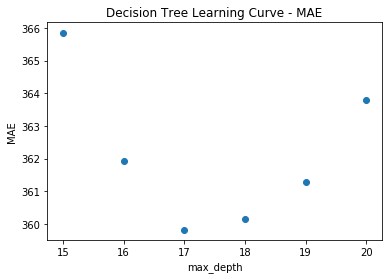

In [154]:
df_Results_5 = DecisionTree_OverfitLimit(['Mean_price_paid','Year', 'X', 'Y'], 'mse', max_depth, 0, 4, 2)

In [155]:
df_Results_5 

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
DecisionTree: max_depth=15.00,DecisionTree,15,"[Mean_price_paid, Year, X, Y]",0.624351,365.854485,287586.355195,0.624323
DecisionTree: max_depth=16.00,DecisionTree,16,"[Mean_price_paid, Year, X, Y]",0.626473,361.928234,285965.504272,0.626440
DecisionTree: max_depth=17.00,DecisionTree,17,"[Mean_price_paid, Year, X, Y]",0.624916,359.832636,287175.930045,0.624859
DecisionTree: max_depth=18.00,DecisionTree,18,"[Mean_price_paid, Year, X, Y]",0.620736,360.146529,290384.708713,0.620667
DecisionTree: max_depth=19.00,DecisionTree,19,"[Mean_price_paid, Year, X, Y]",0.615333,361.283080,294512.238338,0.615275
DecisionTree: max_depth=20.00,DecisionTree,20,"[Mean_price_paid, Year, X, Y]",0.609621,363.801641,298897.323708,0.609547


In [175]:
max_depth = [15, 16, 17, 18, 19, 20]

DecisionTree: max_depth=15.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 394.08
MSE: 323814.18
R2-score: 0.58
 


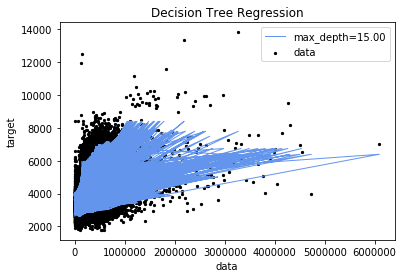

DecisionTree: max_depth=16.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 393.07
MSE: 322464.20
R2-score: 0.58
 


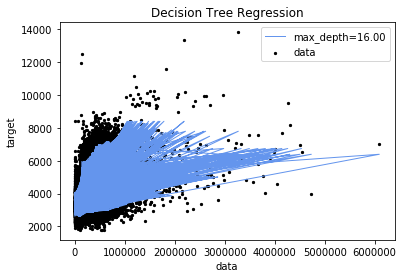

DecisionTree: max_depth=17.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 392.66
MSE: 321941.04
R2-score: 0.58
 


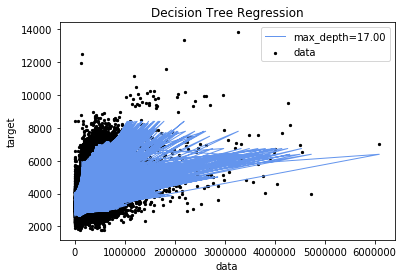

DecisionTree: max_depth=18.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 392.29
MSE: 321424.68
R2-score: 0.58
 


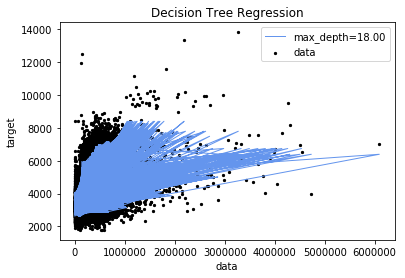

DecisionTree: max_depth=19.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 392.25
MSE: 321320.87
R2-score: 0.58
 


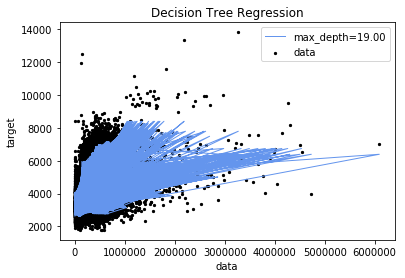

DecisionTree: max_depth=20.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 392.24
MSE: 321309.24
R2-score: 0.58
 


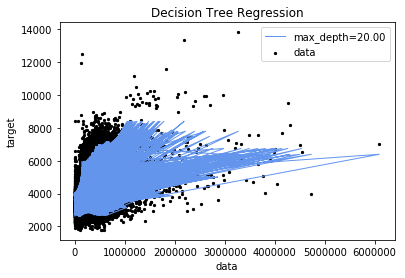

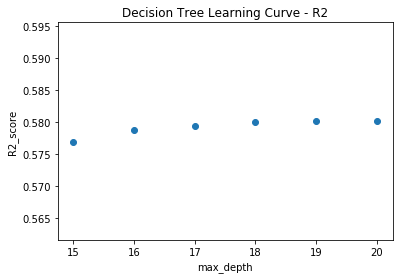

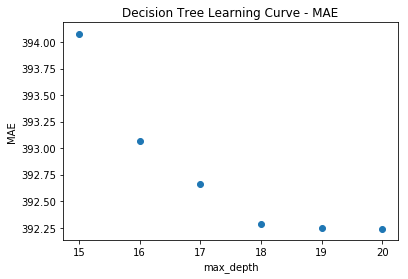

In [182]:
df_Results_6 = DecisionTree_OverfitLimit(['Mean_price_paid','Year', 'X', 'Y'], 'mse', max_depth, 0, 160, 40)

In [183]:
df_Results_6

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
DecisionTree: max_depth=15.00,DecisionTree,15,"[Mean_price_paid, Year, X, Y]",0.577005,394.078072,323814.181682,0.576998
DecisionTree: max_depth=16.00,DecisionTree,16,"[Mean_price_paid, Year, X, Y]",0.578770,393.072402,322464.197713,0.578761
DecisionTree: max_depth=17.00,DecisionTree,17,"[Mean_price_paid, Year, X, Y]",0.579452,392.663929,321941.042542,0.579445
DecisionTree: max_depth=18.00,DecisionTree,18,"[Mean_price_paid, Year, X, Y]",0.580126,392.285212,321424.680236,0.580119
DecisionTree: max_depth=19.00,DecisionTree,19,"[Mean_price_paid, Year, X, Y]",0.580261,392.246844,321320.868436,0.580255
DecisionTree: max_depth=20.00,DecisionTree,20,"[Mean_price_paid, Year, X, Y]",0.580276,392.242863,321309.242496,0.580270


Increasing the minimum samples substantially does eventually result in a change to the peak model performance and a flattening of the curve, showing that the model is well controlled and fitted with max_depth set to between 16-17 for this model. With a depth of 18, the model starts to become overfitted with MAE increasing again and R2-score decreasing.


In [ ]:
#END